<div>
    <table style="border:2px solid white;" cellspacing="0" cellpadding="0" border-collapse: collapse; border-spacing: 0;>
      <tr> 
        <th style="background-color:white"> <img src="../media/ccal-logo-D3.png" width=225 height=225></th>
        <th style="background-color:white"> <img src="../media/logoMoores.jpg" width=175 height=175></th>
        <th style="background-color:white"> <img src="../media/GP.png" width=200 height=200></th>
        <th style="background-color:white"> <img src="../media/UCSD_School_of_Medicine_logo.png" width=175 height=175></th> 
        <th style="background-color:white"> <img src="../media/Broad.png" width=130 height=130></th> 
      </tr>
    </table>
</div>

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
# **Onco-*GPS* Methodology**
## **Chapter 8. Defining Global Cellular States and Onco-*GPS* Map **

<div>
    <img src="../media/authors.png" width=900 height=50>
</div>

**Date:** April 17, 2017

**Article:** [*Kim et al.* Decomposing Oncogenic Transcriptional Signatures to Generate Maps of Divergent Cellular States](https://drive.google.com/file/d/0B0MQqMWLrsA4b2RUTTAzNjFmVkk/view?usp=sharing)

**Analysis overview:** In this chapter we generate a more complex “global” Onco-GPS maps using all the 9 KRAS components.

<div>
    <img src="../media/method_chap7.png" width=2144 height=1041>
</div>

In the next chapter we will use this global Onco-GPS to visualize the association of selected pathway and gene expression.

Go to the [next chapter (9)](9 Displaying Genomic Features in the Global Onco-GPS Map.ipynb).
Back to the [introduction chapter (0)](0 Introduction and Overview.ipynb).

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 1. Set up notebook and import Computational Cancer Analysis Library ([CCAL](https://github.com/KwatME/ccal))

In [1]:
from environment import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

### 2. Read the oncogenic components 

#### 2.1 Read H matrix with all the KRAS components

In [2]:
h_matrix = ccal.read_gct('../results/nmf_cc/nmf/nmf_k9_h.gct')

#### 2.2 Display oncogenic components in a heatmap

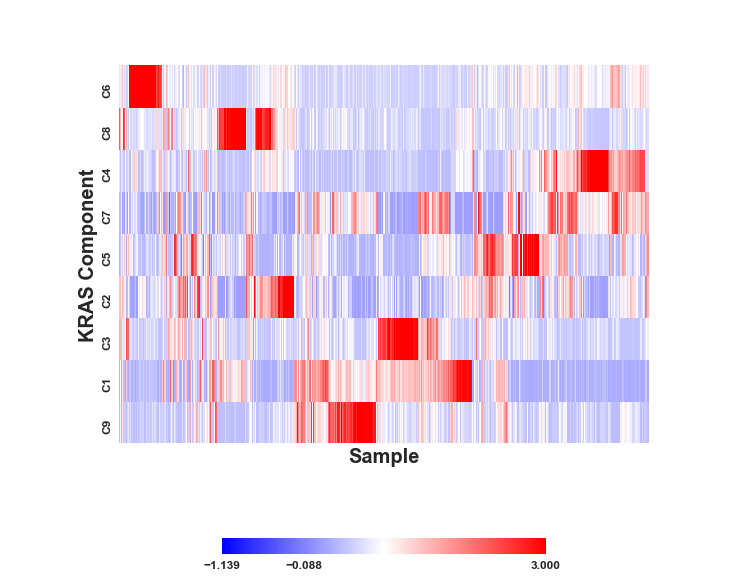

In [3]:
ccal.plot_heatmap(
    dataframe=h_matrix,
    normalization_method='-0-',
    normalization_axis=1,
    cluster=True,
    xlabel='Sample',
    ylabel='KRAS Component',
    xticklabels=False)

### 3. Define the oncogenic states

Cluster all the samples in the refrence dataset using all the 9 components. Based the Consensus-Clustering-Cophenetic-Correlation coefficients Vs. k plot below, we choose a stable solution with large number of states to have increased resolution. We chose k=15.

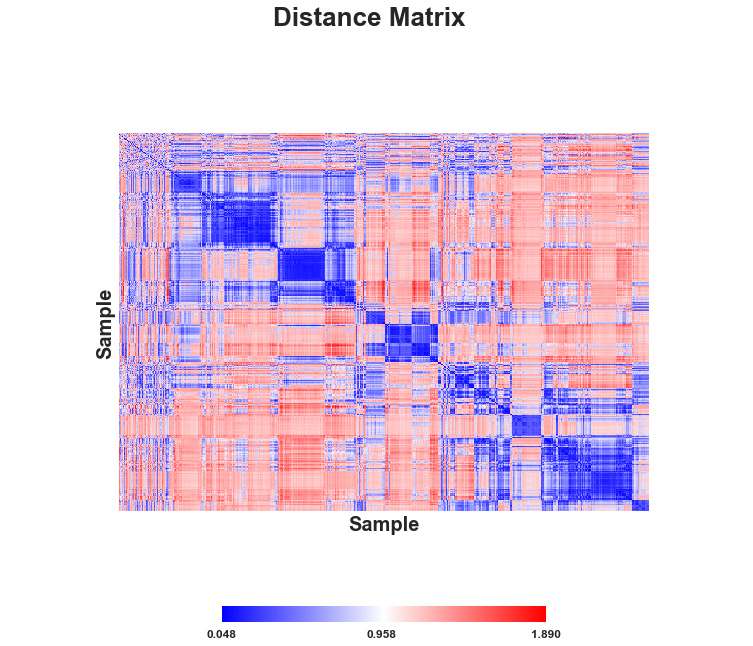

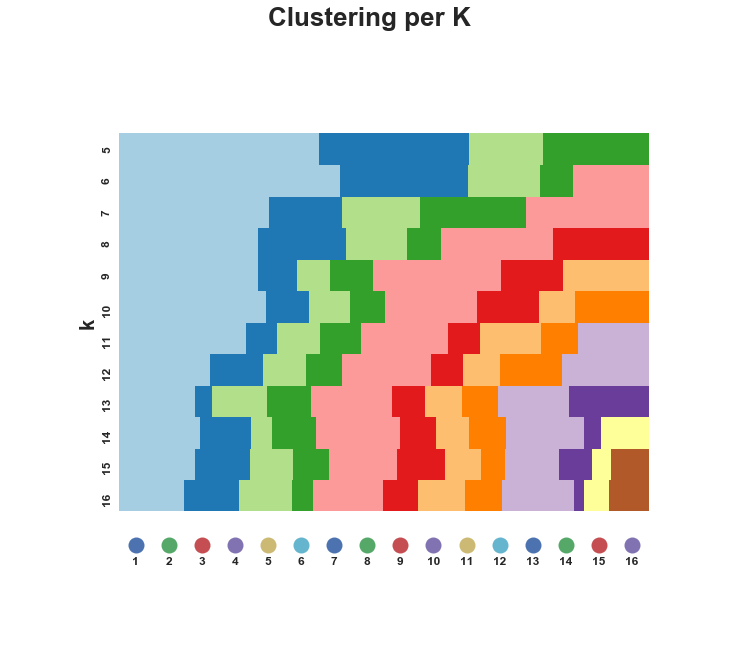

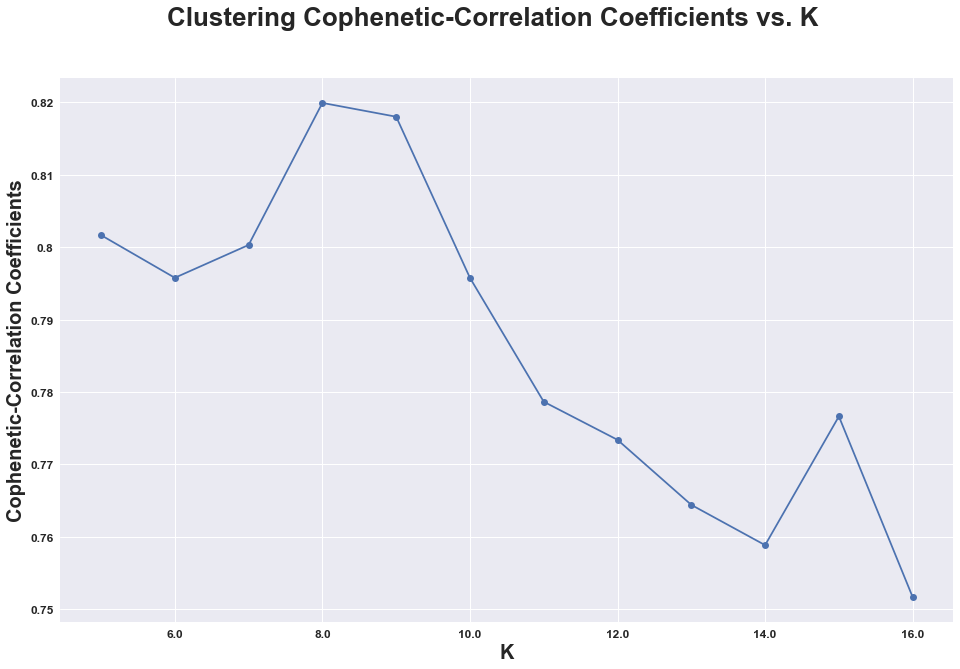

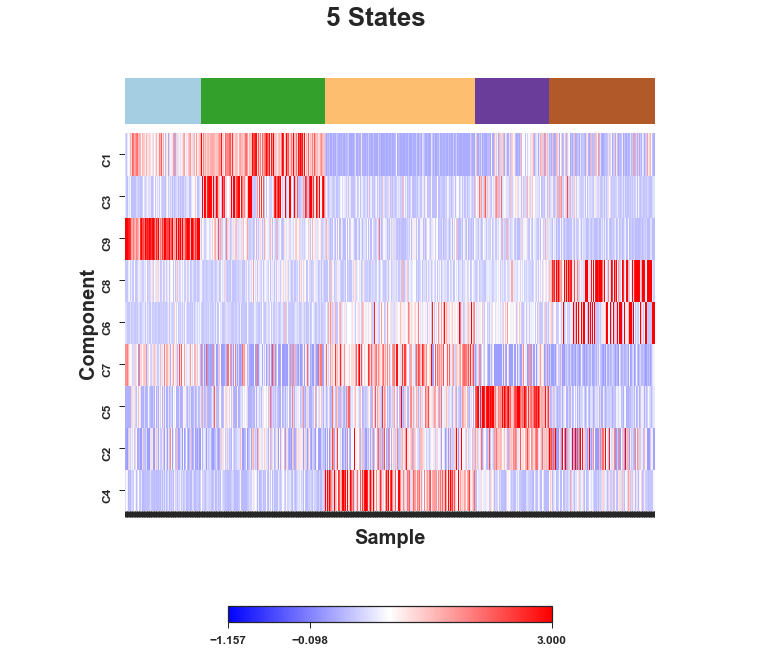

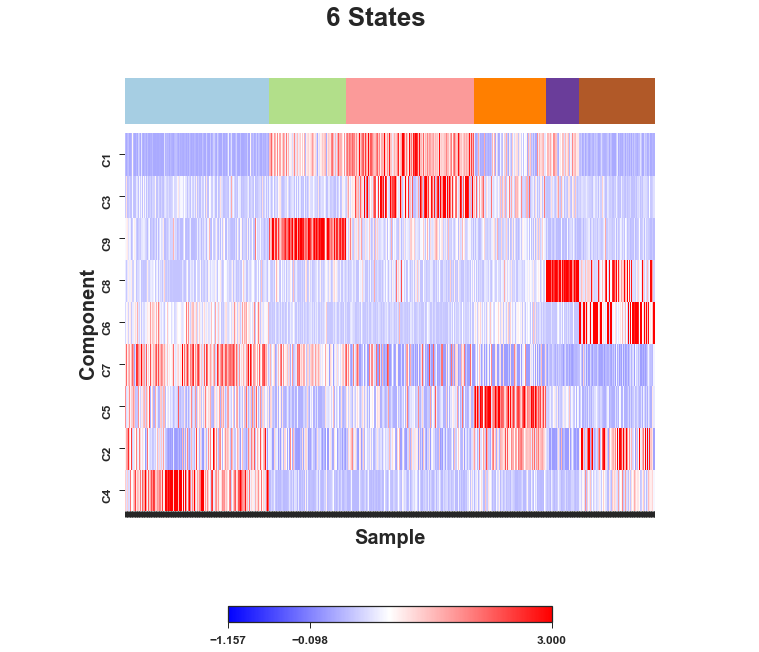

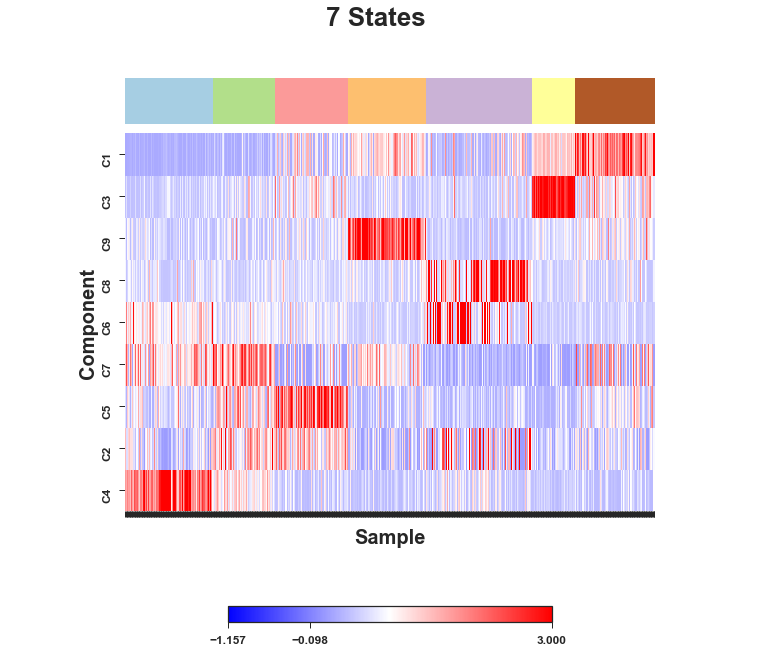

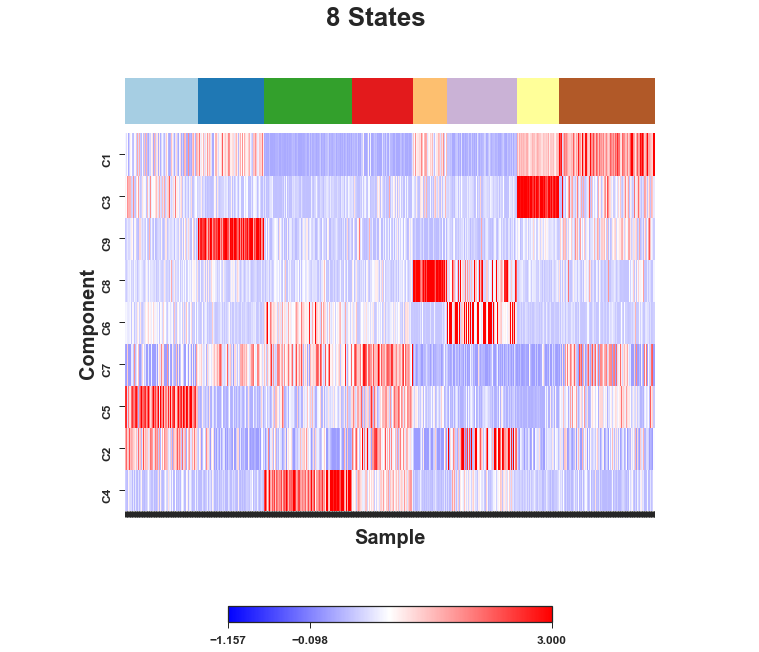

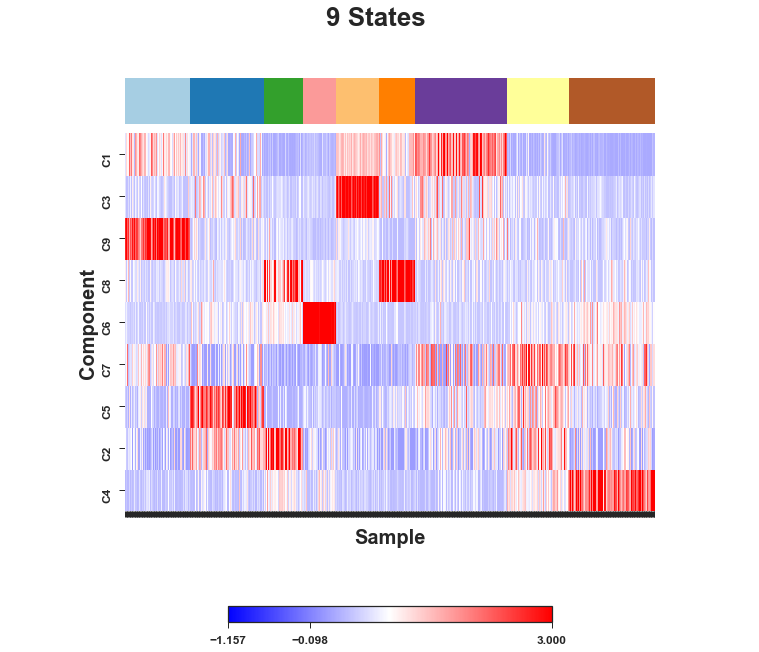

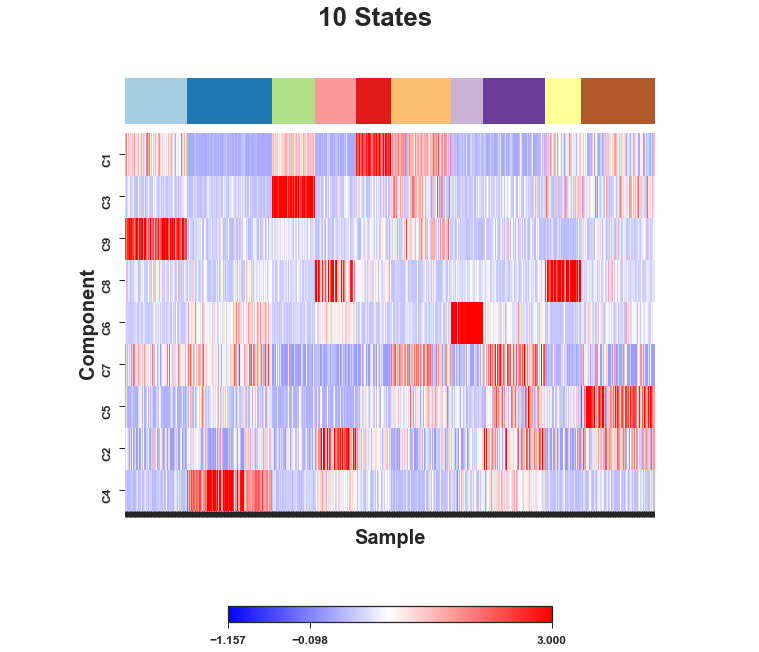

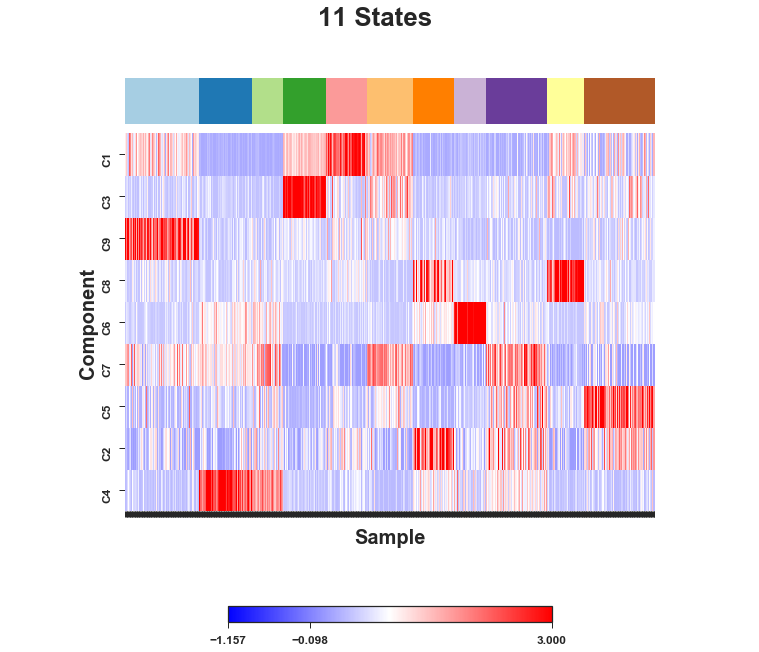

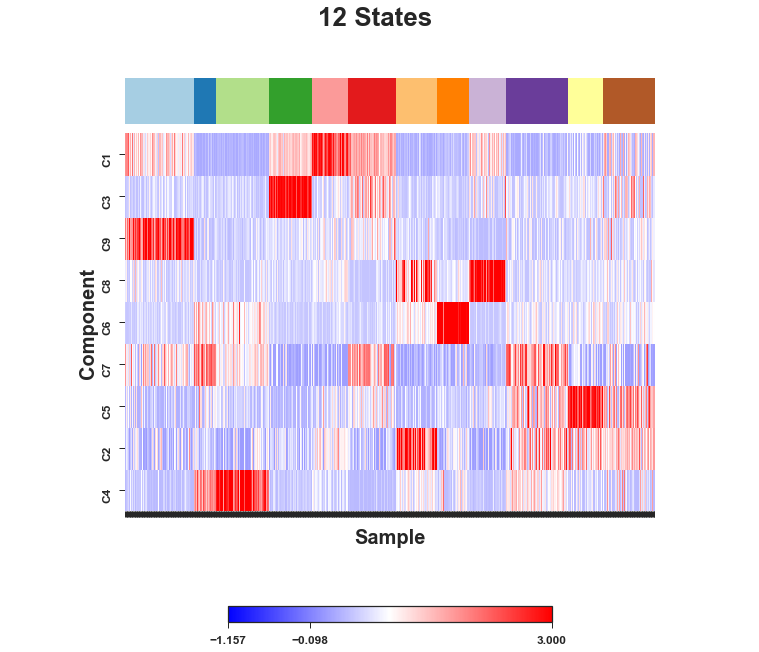

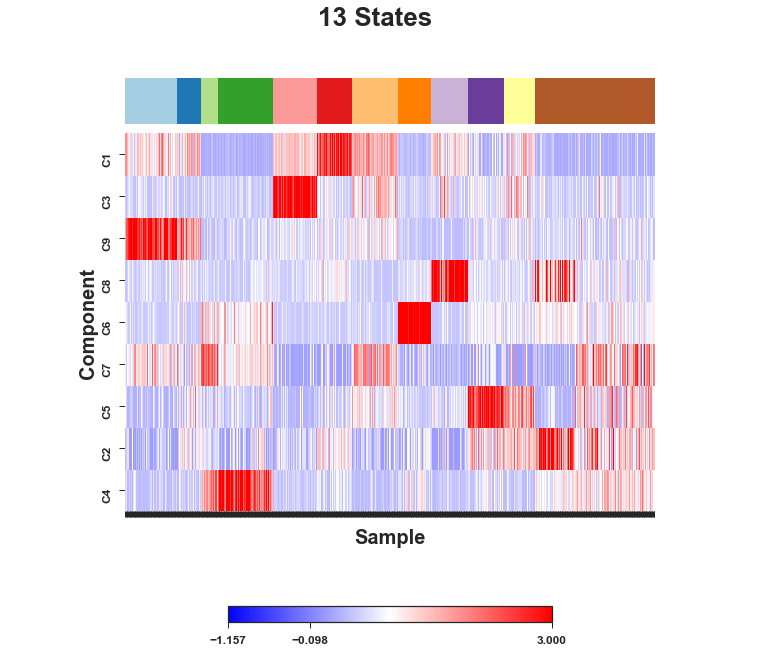

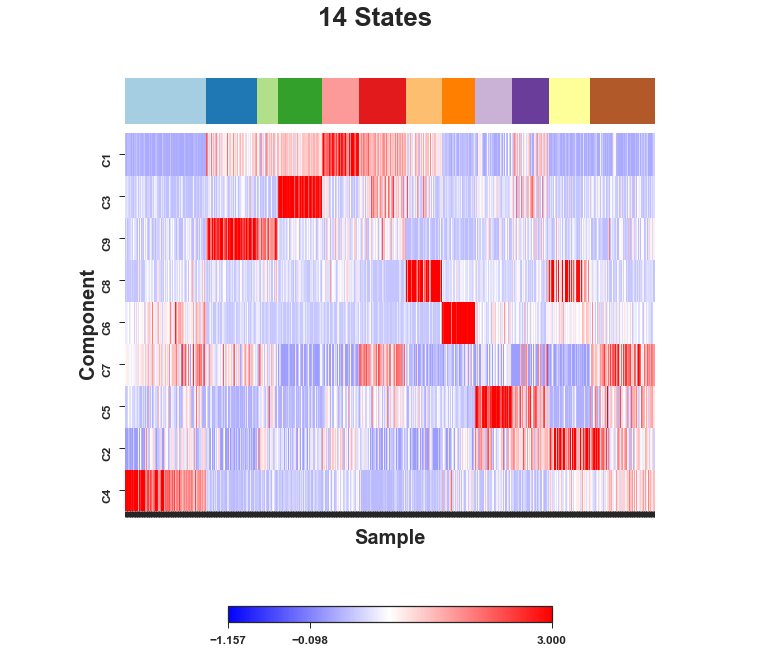

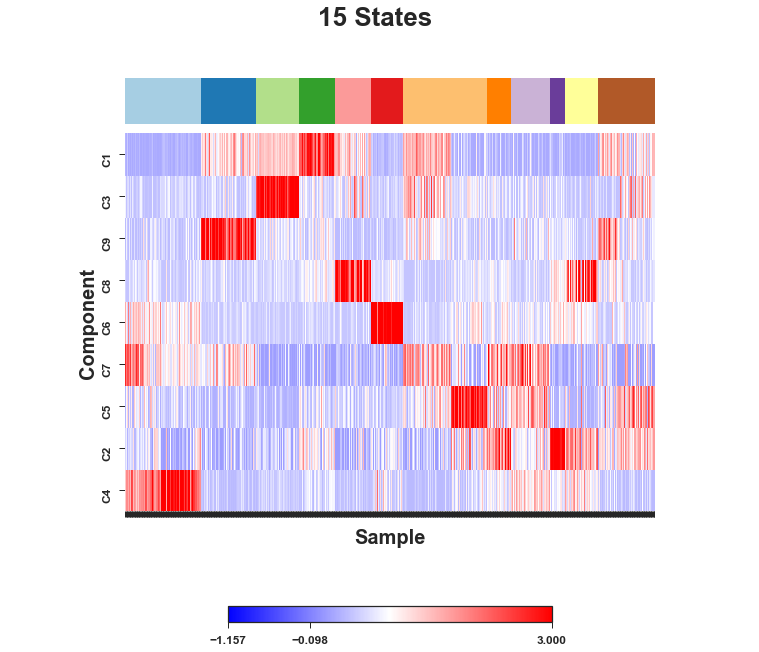

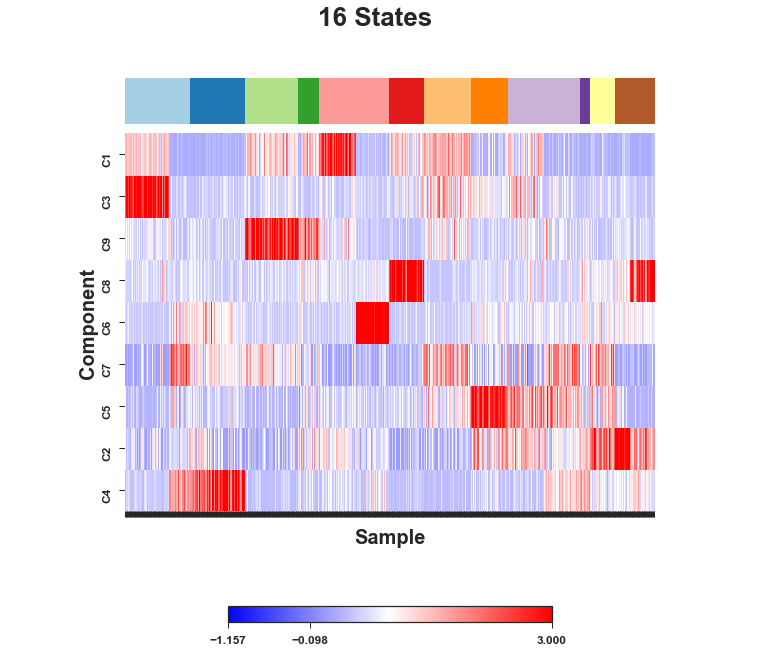

In [4]:
global_dist_matrix, global_clusterings, global_cophen_coeff = ccal.oncogps.define_states(
    matrix=h_matrix,
    ks=range(5, 17),
    n_clusterings=30,
    random_seed=830574,
    max_std=3,
    directory_path='../results/global')

### 4. Make a heatmap of the selected (k=15) states



#### 4.1 Read clustering labels

In [5]:
global_clusterings = ccal.read_gct(
    '../results/global/clusterings/clusterings.gct')

#### 4.2 Select state labels for the k=15 oncogenic states

In [6]:
global_sample_labels = global_clusterings.ix[15, :]

#### 4.3 Define names for the components and colors for the states

In [7]:
component_names = [
    'C1 ERBB3/PI3K', 'C3 RAS/WNT/PI3K', 'C9 KRAS/AP1', 'C8 MYC',
    'C6 BRAF/MAPK', 'C7 TNF/NFkB', 'C5 HNF1/PAX8', 'C2 MYC/E2F', 'C4 EMT'
]

In [8]:
colors = [
    '#993300',  # Brown
    '#FFD700',  # Gold
    '#E74C3C',  # Red
    '#8B008B',  # Dark magenta  
    '#B0E0E6',  # Powder blue
    '#4169E1',  # Royal blue
    '#DC143C',  # Crimson  
    '#669999',  # Green
    '#F4BD60',  # Light Sandy brown
    '#2E8B57',  # Sea green
    '#4b0082',  # indigo #000080',  # Naby blue 
    '#D2691E',  # Chocolate
    '#FA8072',  # Salmon
    '#DA70D6',  # Orchid  
    '#90EE90'
]  # Light green

#### 4.4 Produce heatmap of the KRAS mutant samples and their membership in each state 
(Fig 6A, top)

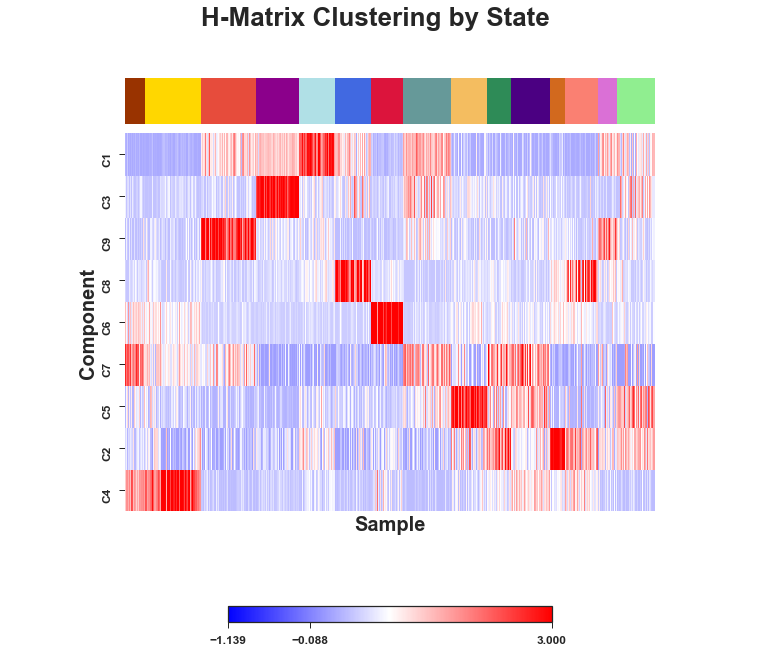

In [9]:
ccal.plot_heatmap(
    dataframe=h_matrix,
    normalization_method='-0-',
    normalization_axis=1,
    data_type='continuous',
    annotation_colors=colors,
    column_annotation=global_sample_labels,
    title='H-Matrix Clustering by State',
    xlabel='Sample',
    ylabel='Component',
    xticklabels=False)

### 5. Generate global Onco-GPS map 
(Fig S1)

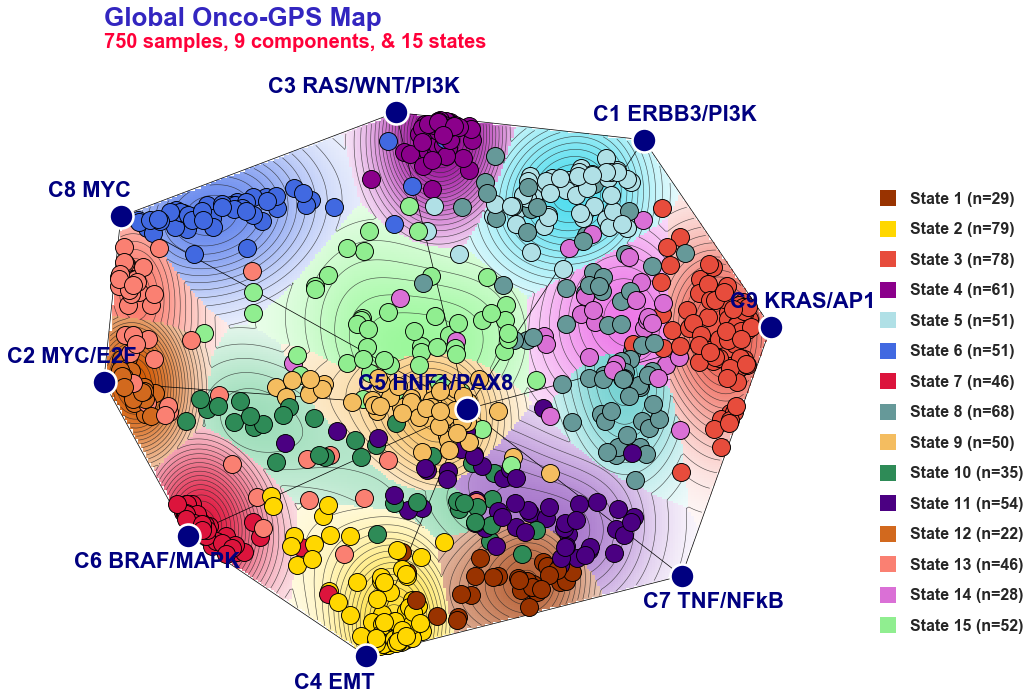

In [10]:
ccal.oncogps.make_oncogps(
    training_h=h_matrix,
    training_states=global_sample_labels,
    title='Global Onco-GPS Map',
    power=2.5,
    component_markersize=24,
    component_fontsize=22,
    component_markerfacecolor='#000080',
    sample_markersize=18,
    mds_seed=1234,
    std_max=2,
    state_colors=colors,
    kde_bandwidth_factor=1.25,
    informational_mds=False,
    component_names=component_names)
#filepath = DIR_RESULT + '/Global_Onco-GPS.pdf')